# Imports

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as time_time
import sys


# Events File
## Import

In [52]:
columns = ['request_id', 'cli', 'e.fleet_id', 'taxi', 'time', 'dispatch_date', 'schedule_date', 'event', 'taxiFlags', 'reqFlags', 'r.operator_id', 'e.operator_id']
df = pd.read_csv('../../csv_s/luc_csv.csv', names=columns)

df.head()

,request_id,cli,e.fleet_id,taxi,time,dispatch_date,schedule_date,event,taxiFlags,reqFlags,r.operator_id,e.operator_id
0,6213339L,'917665187',0L,187L,1577875920.04847,1.577876e+09,1.577876e+09,'a',0L,11L,32L,18L
1,6213339L,'917665187',0L,187L,1577875926.11388,1.577876e+09,1.577876e+09,'A',0L,11L,32L,19L
2,6213339L,'917665187',0L,950L,1577875920.03415,1.577876e+09,1.577876e+09,'c',0L,11L,32L,18L
3,6213339L,'917665187',0L,187L,1577876426.69929,1.577876e+09,1.577876e+09,'p',0L,11L,32L,19L
4,6213339L,'917665187',0L,187L,1577877792.16427,1.577876e+09,1.577876e+09,'q',0L,11L,32L,19L


## Filter invalide values

In [53]:
df.dropna(inplace=True)

# invalid time
def filterDf(e):
    try:
        float(e)
        return True
    except:
        return False

df = df[[ i for i in map(filterDf, df['time'])]]
df.head()

,request_id,cli,e.fleet_id,taxi,time,dispatch_date,schedule_date,event,taxiFlags,reqFlags,r.operator_id,e.operator_id
0,6213339L,'917665187',0L,187L,1577875920.04847,1.577876e+09,1.577876e+09,'a',0L,11L,32L,18L
1,6213339L,'917665187',0L,187L,1577875926.11388,1.577876e+09,1.577876e+09,'A',0L,11L,32L,19L
2,6213339L,'917665187',0L,950L,1577875920.03415,1.577876e+09,1.577876e+09,'c',0L,11L,32L,18L
3,6213339L,'917665187',0L,187L,1577876426.69929,1.577876e+09,1.577876e+09,'p',0L,11L,32L,19L
4,6213339L,'917665187',0L,187L,1577877792.16427,1.577876e+09,1.577876e+09,'q',0L,11L,32L,19L


## Filter events other than 'p'

In [54]:
def transformEvent(event):
    return event.replace("'", '').replace(' ', '')

df['event'] = df['event'].transform(transformEvent)
df = df[df['event'] == 'p']

df.head()

,request_id,cli,e.fleet_id,taxi,time,dispatch_date,schedule_date,event,taxiFlags,reqFlags,r.operator_id,e.operator_id
3,6213339L,'917665187',0L,187L,1577876426.69929,1.577876e+09,1.577876e+09,p,0L,11L,32L,19L
9,6213650L,'226083900',0L,436L,1577856174.51031,1.577856e+09,1.577857e+09,p,83886080L,9L,6L,19L
17,6213708L,'0034674809288',0L,693L,1577857840.81193,1.577858e+09,1.577858e+09,p,0L,8L,6L,19L
24,6213908L,'916828692',0L,534L,1577858210.85629,1.577858e+09,1.577858e+09,p,0L,11L,8L,19L
32,6214373L,'210417160',0L,520L,1577862578.19791,1.577861e+09,1.577862e+09,p,524296L,11L,8L,19L


## Transforms
### Cli

In [55]:
def transformCli(cli):
    c = cli.strip().replace("'", '')
    if len(c) > 3 and c[0:4] == '+351':
        c = c[4:] 
    return str(c)

df['cli'] = df['cli'].transform(transformCli)
df = df[df['cli']!='']

### Taxi

In [56]:
def transformTaxi(taxi):
    taxi = str(taxi)
    taxi = taxi[1:-1]
    return int('2'+ '0'*(7-len(taxi)) + taxi)
df['taxi_t'] = df['taxi'].transform(transformTaxi)

### Time

In [57]:
def transformTime(time):
    time = str(time)
    time = time.strip()
    return float(time)
df['time'] = df['time'].transform(transformTime)

### reqFlags

In [58]:
def transfReqFlags(flag):
    return flag.strip()[:-1]

df['reqFlags'] = df['reqFlags'].transform(transfReqFlags)

### operator_id

In [59]:
def transformOperatorId(operator_id):
    return operator_id.strip()[:-1]

df['r.operator_id'] = df['r.operator_id'].transform(transformOperatorId)
df['e.operator_id'] = df['e.operator_id'].transform(transformOperatorId)

#### operator_id simplify variable
In this section we will simplify the operator id variable. We will transform the variable in only five groups: 
- 15: smart phone
- 17: app
- 62: kiosk
- 65: webtl
- others: Human

In [60]:
def transformOperatorIdSimplify(operator):
    if(operator == '15'):
        return 'smart_phone'
    elif(operator == '17'):
        return 'app'
    elif(operator == '62'):
        return 'kiosk'
    elif(operator == '65'):
        return 'webtl'
    else:
        return 'human'
df['operator_id'] = df['r.operator_id'].transform(transformOperatorIdSimplify)

In [61]:
df.head(1)

,request_id,cli,e.fleet_id,taxi,time,dispatch_date,schedule_date,event,taxiFlags,reqFlags,r.operator_id,e.operator_id,taxi_t,operator_id
3,6213339L,917665187,0L,187L,1.577876e+09,1.577876e+09,1.577876e+09,p,0L,11,32,19,20000187,human


# Requests Files
## Import

In [84]:
df2 =  pd.read_csv('../../csv_s/lucas_2020.csv')

len(df2)

607221

In [96]:
len(df[df['cli'] == '933848797']['r.operator_id'])

88

## Filter Invalid Values

In [63]:
df2.dropna(inplace=True)
# df2 = df2[df2['State'] == 6]
df2.dropna(inplace=True)
df2.head()

,Taxi_ID,State,Timestamp,Stand,Src,Dst,Distance,Duration
0,20000012,6,1577837132,0,"(-8.60643, 41.144607)","(-8.591688, 41.146677000000004)",2351.740022,298
1,20000031,6,1577837216,0,"(-8.609184, 41.162274000000004)","(-8.609967000000001, 41.153832)",959.068005,102
2,20000667,6,1577837386,0,"(-8.619795, 41.148018)","(-8.624358, 41.179554)",4406.003140,513
3,20000607,6,1577837418,0,"(-8.612991000000001, 41.155182)","(-8.630595, 41.15448)",2557.944254,327
4,20000856,6,1577837503,0,"(-8.621397, 41.152833)","(-8.641323, 41.144175000000004)",5728.895360,472


## Transforms
### Timestamp

In [64]:
df2['Timestamp'] = df2['Timestamp'].transform(float)
# df2['id'] = [id+1 for id in range(len(df2))]

### Src & Dst

In [65]:
def tranfCoords(x):
    x = x.replace(' ', '')
    y = x[1: -1].split(',')
    return [float(y[0]), float(y[1])]

df2['Src'] = df2['Src'].transform(tranfCoords)
df2['Dst'] = df2['Dst'].transform(tranfCoords)

# Join Files
## Custom print < Move to utilit file >

In [66]:
# print time
def printTime(time):
    time = int(time*1000)
    hour = int(time/3600000)
    min = int((time - hour * 3600000) / 60000)
    sec = int(( time - hour * 3600000  - min*60000 )/1000)
    mil_sec = time - hour * 3600000  - min * 60000 - sec * 1000
    return format(hour, '02d') + ': ' + format(min, '02d') + ': ' + format(sec, '02d') + ': ' + format(mil_sec, '04d')

class PrintInfo:
    def __init__(self, data, info):
        self.current = -1
        self.data = data
        self.time = time_time.time()
        self.info = info

    def __iter__(self):
        return self

    def __next__(self):
        self.current += 1
        if self.current % int(len(self.data)/10000) == 0:
            s = str(self.current)+' | '
            s += "%.2f" % round((self.current /len(self.data))*100, 2) + '% | '
            s += printTime(time_time.time() - self.time) + ' | '
            s += printTime( (time_time.time() - self.time)*len(self.data)/(self.current+1) ) + ' | '
            s += 'Matching: ' + str(len(self.info)) + ' | '
            s += 'Ratio: ' + "%.2f" % round((len(self.info) /(self.current+1))*100, 2) + '% | '

            sys.stdout.write("\r" + s)
            sys.stdout.flush()

        if self.current < len(self.data):
            return self.data[self.current]
        raise StopIteration
        

In [67]:
df.head(1)

,request_id,cli,e.fleet_id,taxi,time,dispatch_date,schedule_date,event,taxiFlags,reqFlags,r.operator_id,e.operator_id,taxi_t,operator_id
3,6213339L,917665187,0L,187L,1.577876e+09,1.577876e+09,1.577876e+09,p,0L,11,32,19,20000187,human


In [68]:
df2.head(1)

,Taxi_ID,State,Timestamp,Stand,Src,Dst,Distance,Duration
0,20000012,6,1.577837e+09,0,"[-8.60643, 41.144607]","[-8.591688, 41.146677000000004]",2351.740022,298


In [69]:
data = []

d_1 = df.sort_values(by=['time']).to_numpy()

df_dict = {}
for taxi in df2['Taxi_ID']:
    if taxi not in df_dict:
        df_dict[taxi] = df2[df2['Taxi_ID'] == taxi].sort_values(by=['Timestamp']).to_numpy()

for row_1 in PrintInfo(d_1, data):
    time = int(row_1[4])
    taxi_1 = int(row_1[12])

    if taxi_1 in df_dict:
        for row_2 in  df_dict[taxi_1]:
            timestamp = int(row_2[2])
            t = abs(abs(timestamp - time) - int(row_2[7]))
            if t < 60 * 1:
                # if row_2[8] not in ids:
                data.append( list(row_1) + list(row_2) )
                # ids.append(row_2[8])
                break


211176 | 99.99% | 00: 06: 43: 0981 | 00: 06: 44: 0006 | Matching: 172675 | Ratio: 81.77% | 

# Export File

In [70]:
df3 = pd.DataFrame(data, columns=(list(df.columns) + list(df2.columns)))
df3 = df3.sort_values(by=['time'])
df3.to_csv('../../csv_s/out.csv',index=False)

## Analyze the Error

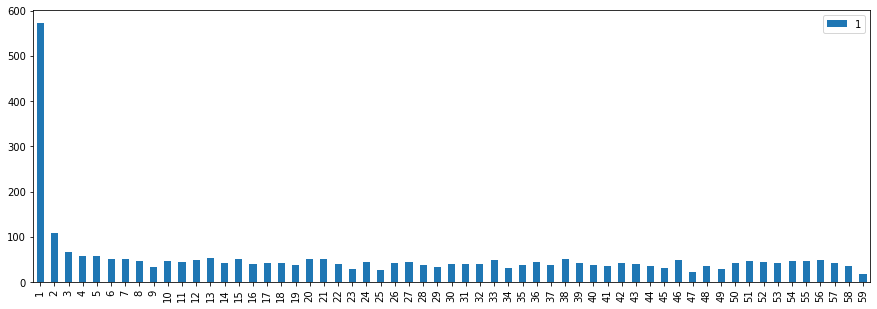

In [71]:
d = {} 
for i in list(abs(df3['time'] - df3['Timestamp']) - df3['Duration']):
    key = int(abs(i))
    if key not in d:
        d[key] = 0
    d[key] += 1

df4 = pd.DataFrame(d, index=[1])
df4 = df4.sort_index(axis=1)
# df4.T.plot.bar(figsize=(15,5))
df4.T.tail(len(df4)-2).plot.bar(figsize=(15,5))


In [82]:
for cli in df.cli.unique():
    if cli[0:4] == '+337' :
        print(cli, cli[4:])

+33764266425 64266425
+33780774447 80774447
+33766693938 66693938
+33782377588 82377588
+33781363553 81363553
+33783956534 83956534
+33782254155 82254155
+33769381881 69381881
+33767584558 67584558
+33760231845 60231845
+33751153018 51153018
+33769703541 69703541
+33768122457 68122457
+33750282591 50282591
+33755010775 55010775
+33767438776 67438776
+33783539064 83539064
+33782670016 82670016
+33761006204 61006204
+33768411303 68411303
+33783735263 83735263
+33770973398 70973398
+33767407995 67407995
